In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
df = pd.read_csv('data/airline_model_data.csv')

## RandomForest

#### Train/Test Split

In [63]:
X = df.drop(columns=["satisfaction_binary", "id", "unnamed:_0"])
y = df['satisfaction_binary']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### Fit Random Forest Model

In [67]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluate Model

Accuracy: 0.9622251094750012
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



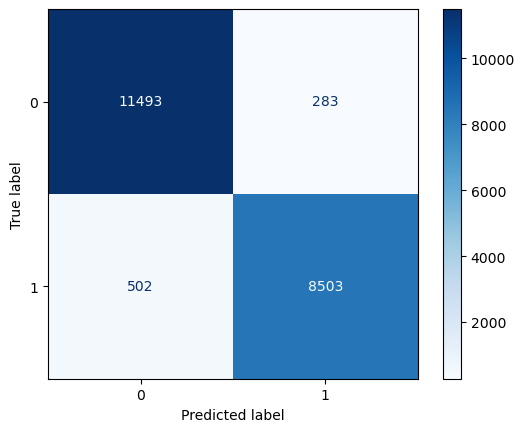

In [68]:
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap = 'Blues');


- **Accuracy**: The model achieved 96.22% accuracy, meaning it correctly predicted satisfaction outcomes for over 96% of all passengers in the test set, regardless of class.

- **Precision**: Our precision metric was 96% for neutral or dissatisfied customers, and 97% for satisfied customers. What this tells us is the model does not hand out satisfaction labels carelessly.

- **Recall**: Recall scored 98% for neutral or dissatisfied customers, and 94% for satisfied customers. What this tells us is the model only captured 94% of all customers who were actually satisfied, missing 6% which are false negatives.

- **F1-Score**: The F1-score balances both precision and recall, and the near-equal scores (97% vs 96%) show that the model performs similarly across both classes, without favoring one heavily.

- **Support**: Support refers to the number of actual samples for each class in the test set. The values (11,776 vs 9,005) indicate that the dataset is moderately imbalanced, but not severely — which means the model has enough representation from both classes to learn from.

- #### **Why Precision Matters Most**: In this case, Type I errors (predicting a passenger is satisfied when they are not) are more detrimental to the airline, as they can create a false sense of success and mask areas needing improvement. Therefore, we prioritize **precision**—especially for the "Satisfied" class—as it measures how many of the passengers predicted as satisfied truly were. Our Random Forest model achieved a precision score of **97%** for satisfied customers, outperforming KNN and minimizing the most business-critical error type.


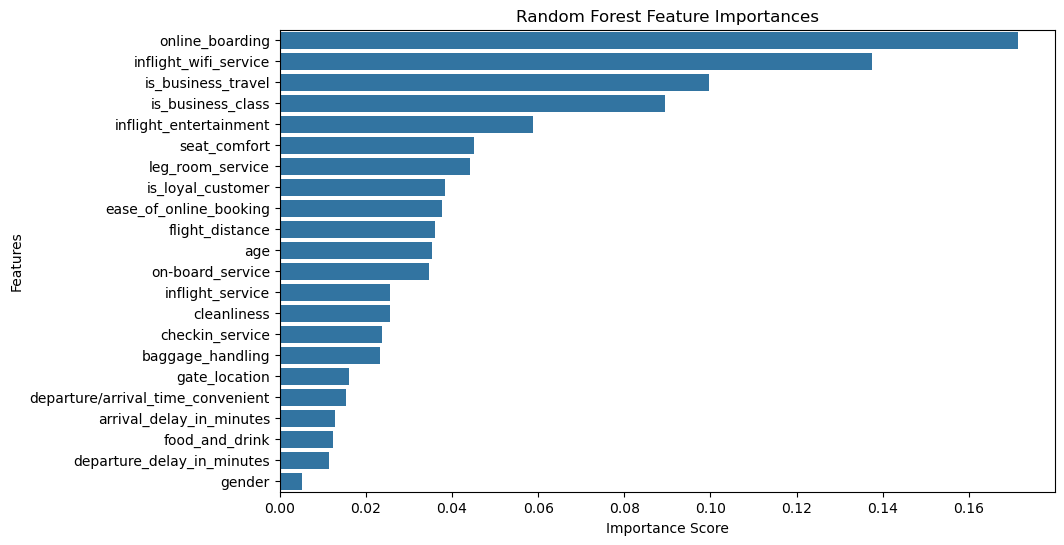

In [71]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel('Features')
plt.show()

In [40]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [73]:
print(X.columns.tolist())

['gender', 'age', 'flight_distance', 'inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'is_business_class', 'is_business_travel', 'is_loyal_customer']
